#### Content

1. [Introduction](#1)<br>
2. [Load Packages](#2)<br>
    A. [Import](#21)<br>
    B. [Setup](#22)<br>
    C. [Version](#23)<br>
3. [Problem Definition](#3)<br>
    A. [Aim](#31)<br>
    B. [Variables](#32)<br>
4. [Exploratory Data Analysis(EDA)](#4) </b><br>
    A. [Data Collection](#41)<br>
    B. [Data Visualization](#42)<br>
    C. [Data Preprocessing](#43)<br>    
5. [Machine Learning Explainability](#5)<br>
    A. [Partial Dependence Plots](#51)<br>
    B. [SHAP Values](#52)<br>
6. [Model developement](#6)<br>
    A. [Lightbm](#61)<br>
    B. [RandomForestClassifier](#62)<br>
    C. [DecisionTreeClassifier](#63)<br>
    D. [CatBoostClassifier](#64)<br>    
7. [References](#7)<br>

<a id="1"></a>
### 1.Introduction

<a id=2></a>
### 2. Load Packages

<a id="21"></a>
##### A. Import

In [1]:
from sklearn import model_selection, preprocessing, metrics
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import lightgbm as lgb
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

<a id="22"></a>
##### B. Setup

In [2]:
# for get better result chage fold_n to 5
fold_n=5
folds = StratifiedKFold(n_splits=fold_n, shuffle=True, random_state=10)
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)
#pd.set_option('display.max_rows', None)
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<a id="23"></a>
##### C. Version

In [3]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.1.1
sklearn: 0.22.1
scipy: 1.3.1
seaborn: 0.9.0
pandas: 1.0.3
numpy: 1.17.0
Python: 3.7.1 | packaged by conda-forge | (default, Mar 13 2019, 13:32:59) [MSC v.1900 64 bit (AMD64)]


<a id="3"></a>
### 3. Problem Definition 

The Crime Dataset contains socio-economic features from the US 1990 Census. The target is the crime rate per community.<br>
So, let's ivestigate more to understand what is Social Economics?<br>
Based on the [Investopedia](https://www.investopedia.com/terms/s/social-economics.asp), Social economics is a branch of economics that focuses on the relationship between social behavior and economics. It examines how social norms, ethics, emerging popular sentiments, and other social philosophies influence consumer behavior and shape public buying trends. It uses history, current events, politics, and other social sciences to predict potential results from changes to society or the economy.


<a id="31"></a>
##### A. Aim
The goal of this challenge is to explore the data, Prepare the data for further processig and predict the crime rate per comunity.
In this challange, The task is to predict the value of target column.

<a id="32"></a>
##### B. Variables

The data is anonymized which contains:
- 1 column with type of 'object' which is the name of different US cities.
- 2 columns with type of 'int64' and we do not have any information about them.  
- 125 columns with type of 'float64' and we do not have any information about them. 

<a id="4"></a>
### 4. Exploratory Data Analysis(EDA)

<a id="41"></a>
##### A. Data Collection

In [4]:
#reading the dataset
df = pd.read_csv('crime_prep.csv')
df.head()

,target,v_cont_0,v_cat_0,v_cat_1,v_cat_2,v_cat_3,v_cont_5,v_cont_6,v_cont_7,v_cont_8,...,v_cont_117,v_cont_118,v_cont_119,v_cont_120,v_cont_121,v_cont_122,v_cont_123,v_cont_124,v_cont_125,v_cont_126
0,0.20,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.67,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.43,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.12,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.03,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN


In [5]:
cols = df.columns.tolist()
cols = cols[+1:] + cols[:+1]

In [6]:
df = df[cols]

In [7]:
names_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names'

In [8]:
import requests
r = requests.get(names_url)

In [9]:
import re

columns = re.findall(r'\@attribute (\w*)', r.text)
del r

In [10]:
df.columns = columns

In [11]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [12]:
df = df.rename(columns={'ViolentCrimesPerPop':'target'})

In [13]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,target
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [14]:
#displaying the number of rows and columns respectively
df.shape

(1994, 128)

In [15]:
# displying general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to target
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB


The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types as we have a lot of columns with such a data type): number of non-missing values, mean, standard deviation, range (min & max), median (0.50), 0.25 and 0.75 quartiles.

In [16]:
df.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,target
count,1994.000000000000000,820.000000000000000,817.000000000000000,1994.000000000000000,1994.000000000000000,1994.000000000000000,1994.000000000000000,1994.000000000000000,1994.000000000000000,1994.000000000000000,...,1994.000000000000000,1994.000000000000000,1994.000000000000000,319.000000000000000,319.000000000000000,319.000000000000000,319.000000000000000,1994.000000000000000,319.000000000000000,1994.000000000000000
mean,28.683550651955869,58.826829268292684,46188.336597307221382,5.493981945837513,0.057592778335005,0.463395185556670,0.179628886659979,0.753716148445342,0.153681043129388,0.144022066198595,...,0.065230692076229,0.232853560682046,0.161685055165496,0.163103448275862,0.076708463949843,0.698589341692790,0.440438871473354,0.094052156469408,0.195078369905956,0.237978936810430
std,16.397552845418929,126.420560074183413,25299.726569243306585,2.873694016807065,0.126905833138987,0.163716732151122,0.253442059966821,0.244039392224618,0.208877463728625,0.232491622980679,...,0.109459154544606,0.203091835502135,0.229054797939114,0.214778133192152,0.140206988574455,0.213943691555707,0.405808218165673,0.240328277928263,0.164717912487349,0.232984901727964
min,1.000000000000000,1.000000000000000,70.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,...,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,12.000000000000000,9.000000000000000,25065.000000000000000,3.000000000000000,0.010000000000000,0.350000000000000,0.020000000000000,0.630000000000000,0.040000000000000,0.010000000000000,...,0.020000000000000,0.100000000000000,0.020000000000000,0.040000000000000,0.020000000000000,0.620000000000000,0.000000000000000,0.000000000000000,0.110000000000000,0.070000000000000
50%,34.000000000000000,23.000000000000000,48090.000000000000000,5.000000000000000,0.020000000000000,0.440000000000000,0.060000000000000,0.850000000000000,0.070000000000000,0.040000000000000,...,0.040000000000000,0.170000000000000,0.070000000000000,0.080000000000000,0.030000000000000,0.750000000000000,0.500000000000000,0.000000000000000,0.150000000000000,0.150000000000000
75%,42.000000000000000,59.500000000000000,66660.000000000000000,8.000000000000000,0.050000000000000,0.540000000000000,0.230000000000000,0.940000000000000,0.170000000000000,0.160000000000000,...,0.070000000000000,0.280000000000000,0.190000000000000,0.195000000000000,0.060000000000000,0.840000000000000,1.000000000000000,0.000000000000000,0.220000000000000,0.330000000000000
max,56.000000000000000,840.000000000000000,94597.000000000000000,10.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,...,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000


In [17]:
df.describe(include= 'object')

,communityname
count,1994
unique,1828
top,Jacksonvillecity
freq,5


In [18]:
df['communityname'].value_counts()

Jacksonvillecity       5
Greenvillecity         5
Auburncity             5
Athenscity             4
Albanycity             4
                      ..
HotSpringscity         1
Northamptontownship    1
Morgantoncity          1
Somersettown           1
GrandJunctioncity      1
Name: communityname, Length: 1828, dtype: int64

In [19]:
df.describe(include= 'int64')

,state,fold
count,1994.000000000000000,1994.000000000000000
mean,28.683550651955869,5.493981945837513
std,16.397552845418929,2.873694016807065
min,1.000000000000000,1.000000000000000
25%,12.000000000000000,3.000000000000000
50%,34.000000000000000,5.000000000000000
75%,42.000000000000000,8.000000000000000
max,56.000000000000000,10.000000000000000


In [20]:
#total number of null 
df.isnull().sum().max()

1675

In [21]:
#number of nulls per row
df.isnull().sum(axis=1)

0        2
1       24
2       24
3       22
4       22
        ..
1989    24
1990    24
1991     0
1992     0
1993     2
Length: 1994, dtype: int64

In [22]:
#number of nulls per column
df.isnull().sum(axis=0)

state                     0
county                 1174
community              1177
communityname             0
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
target                    0
Length: 128, dtype: int64

In [23]:
df.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'target'],
      dtype='object', length=128)

<a id="42"></a>
##### B. Data Visualization

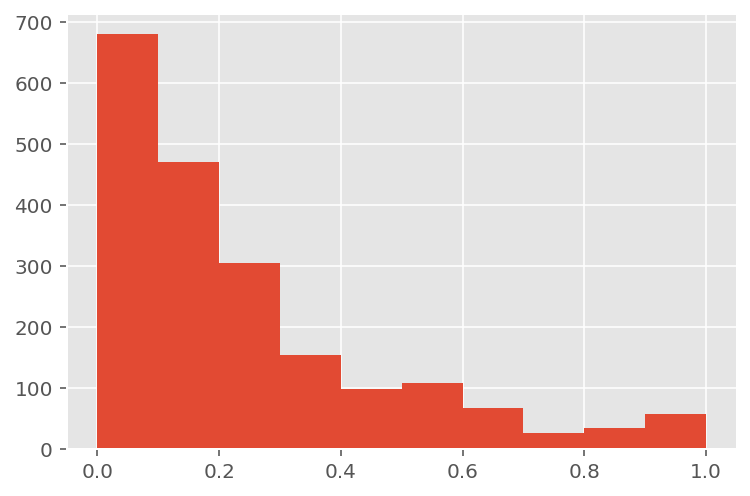

In [24]:
df['target'].hist();

target attribute has a heavy tail toward the right (positive tail).

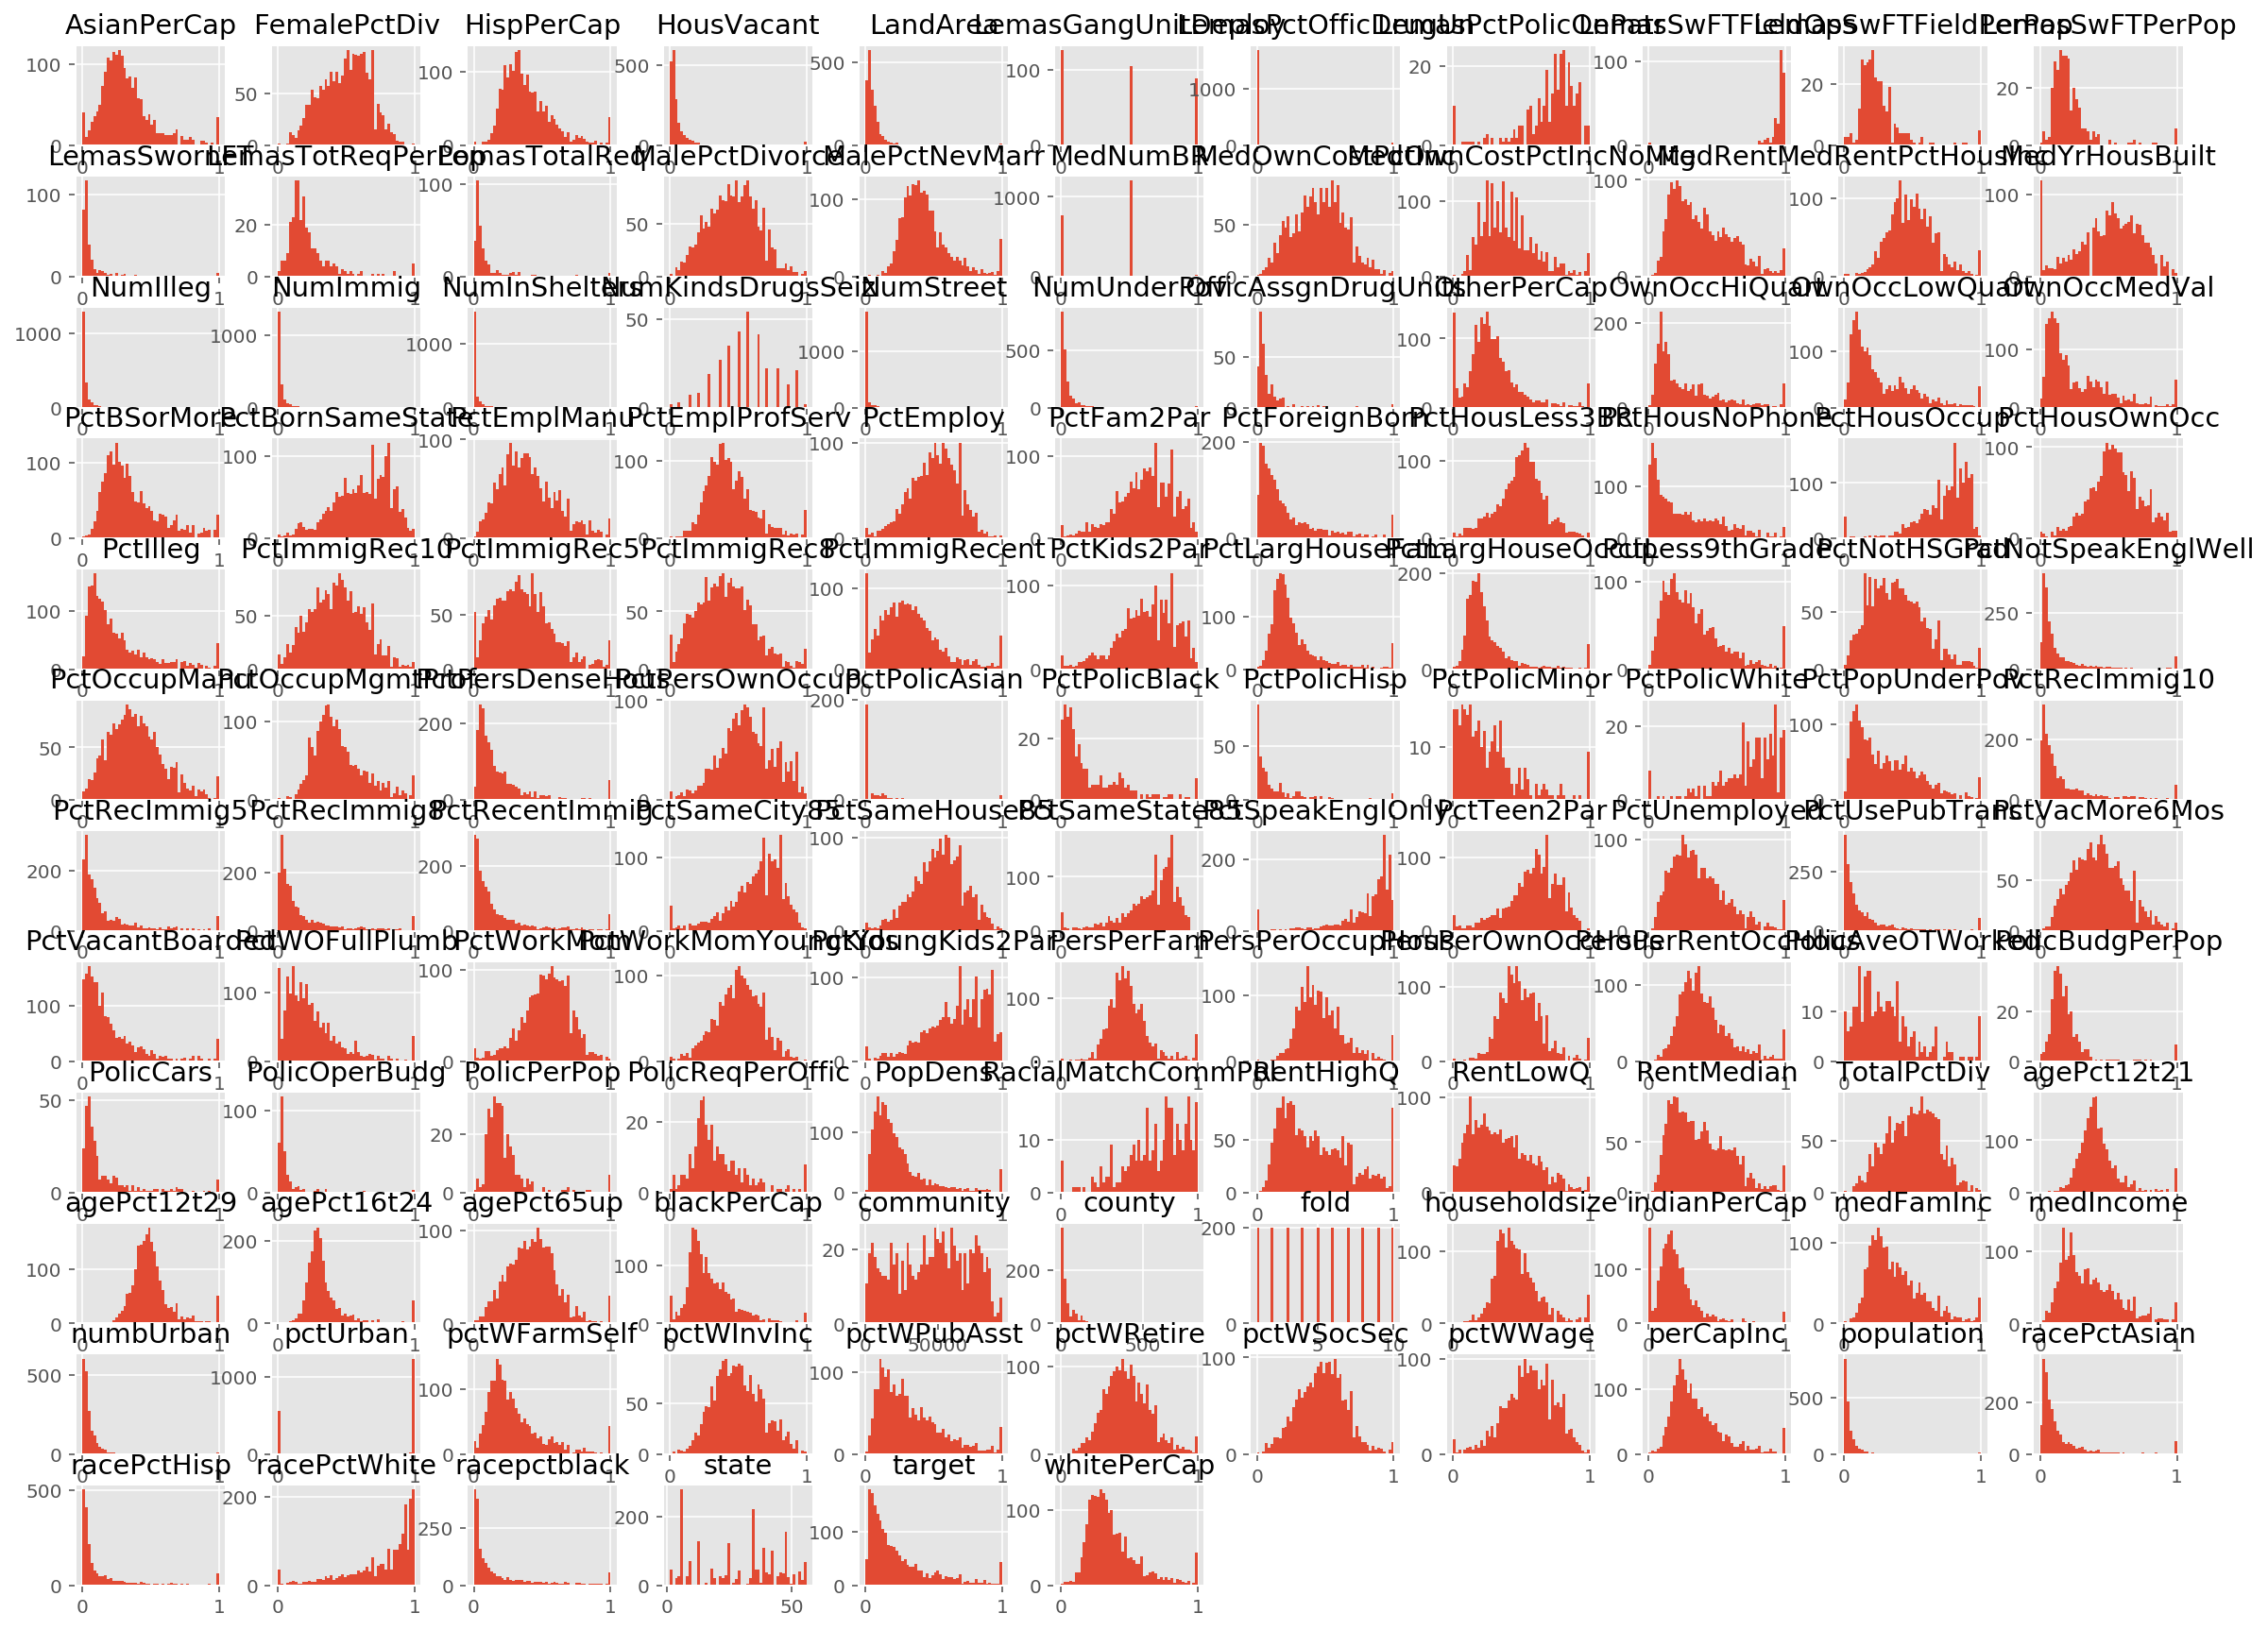

In [25]:
df.hist(bins=50, figsize=(20,15));

In [26]:
corr_matrix = df.corr()

corr_matrix['target'].sort_values(ascending=False)

target              1.000000000000000
PctIlleg            0.737956549858665
racepctblack        0.631263634659704
pctWPubAsst         0.574665267716507
FemalePctDiv        0.556031877334695
                          ...        
PctTeen2Par        -0.661581644430410
PctYoungKids2Par   -0.666058895934798
racePctWhite       -0.684769576271542
PctFam2Par         -0.706667469156987
PctKids2Par        -0.738423802070446
Name: target, Length: 127, dtype: float64

Now, Let's just focuson the first four promissing attributes that seem most correlated with the target.

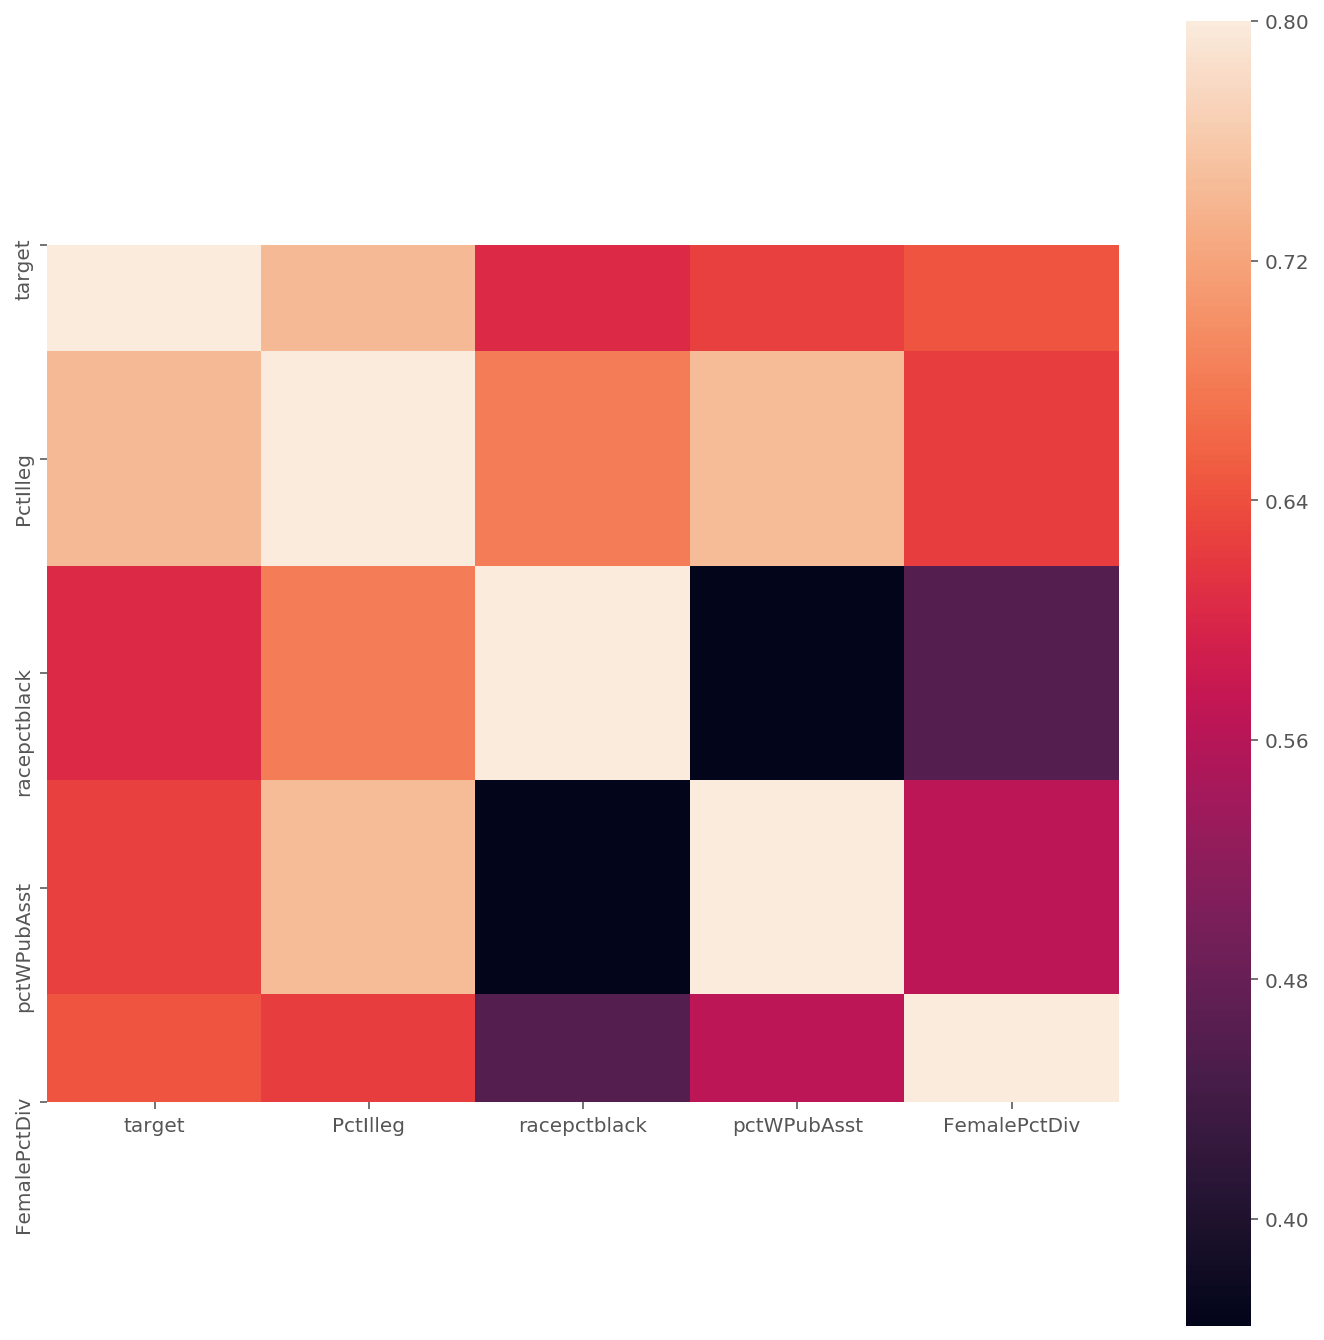

In [27]:
cols_to_use = ['target','PctIlleg', 'racepctblack', 'pctWPubAsst', 'FemalePctDiv']
temp_df = df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

It seems that V_cont_7 has a negative correlation with V_cont_22, v_cont_45, v_cont_46.

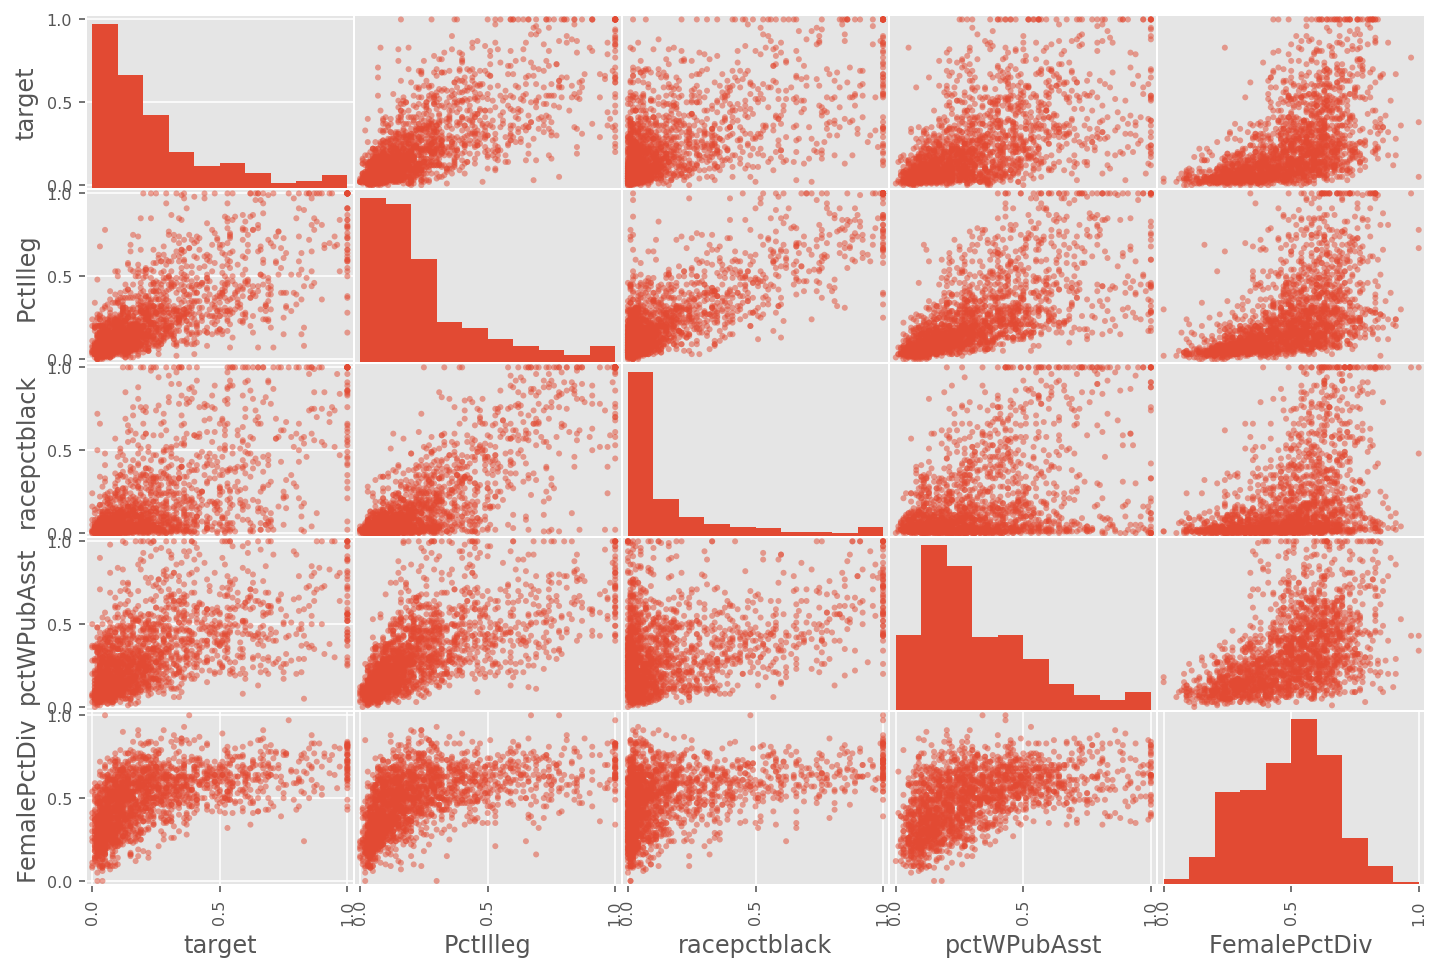

In [28]:
attributes = ['target','PctIlleg', 'racepctblack', 'pctWPubAsst', 'FemalePctDiv']
scatter_matrix(df[attributes], figsize=[12,8]);

target, V_cont_55, v_cont_7,and v_cont_22 they are all have havy tail towards right, however, V_cont_45 and V_cont_46 seems to be more normally distributed.<br
Also, the most promissing atribute to predict the target is v_cont_55, so let's zoom in their correlation scatterplot as follow:

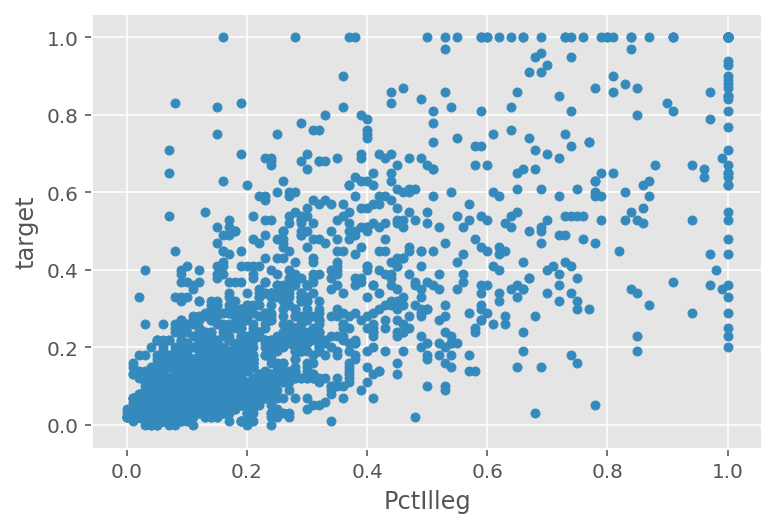

In [29]:
df.plot(kind='scatter', x='PctIlleg', y='target');

This plot reveals intersting things. First the correlation is very strong; you can clearly see the upward trend, and second, the points are not too dispersed. 

## Build a quick baseline

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Create a copy to work with
X = df.copy()

# Save and drop labels
y = df.target
X = X.drop('target', axis=1)

# fill NANs 
X = X.fillna(-999)

# Label encoder
for c in df.columns[df.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

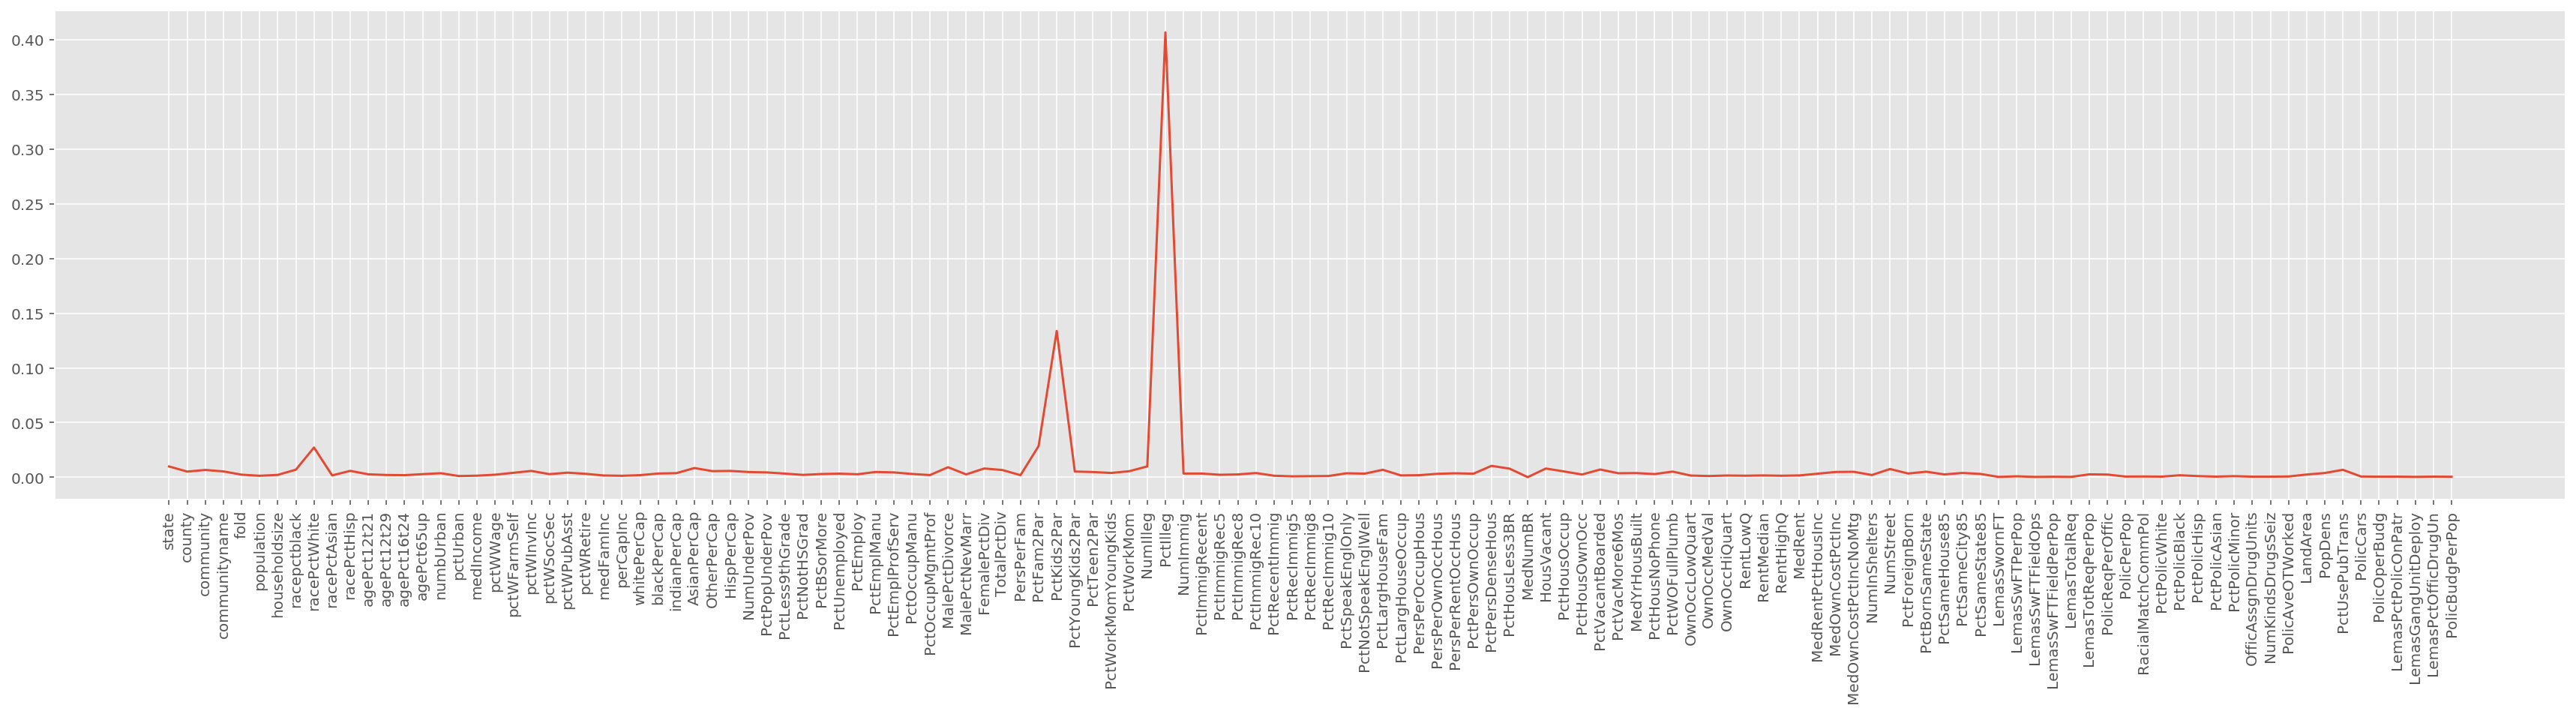

In [31]:
plt.figure(figsize=(30,6))
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90);

In [32]:
import xgboost as xgb
    
model = xgb.XGBRegressor()
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

Features importance done


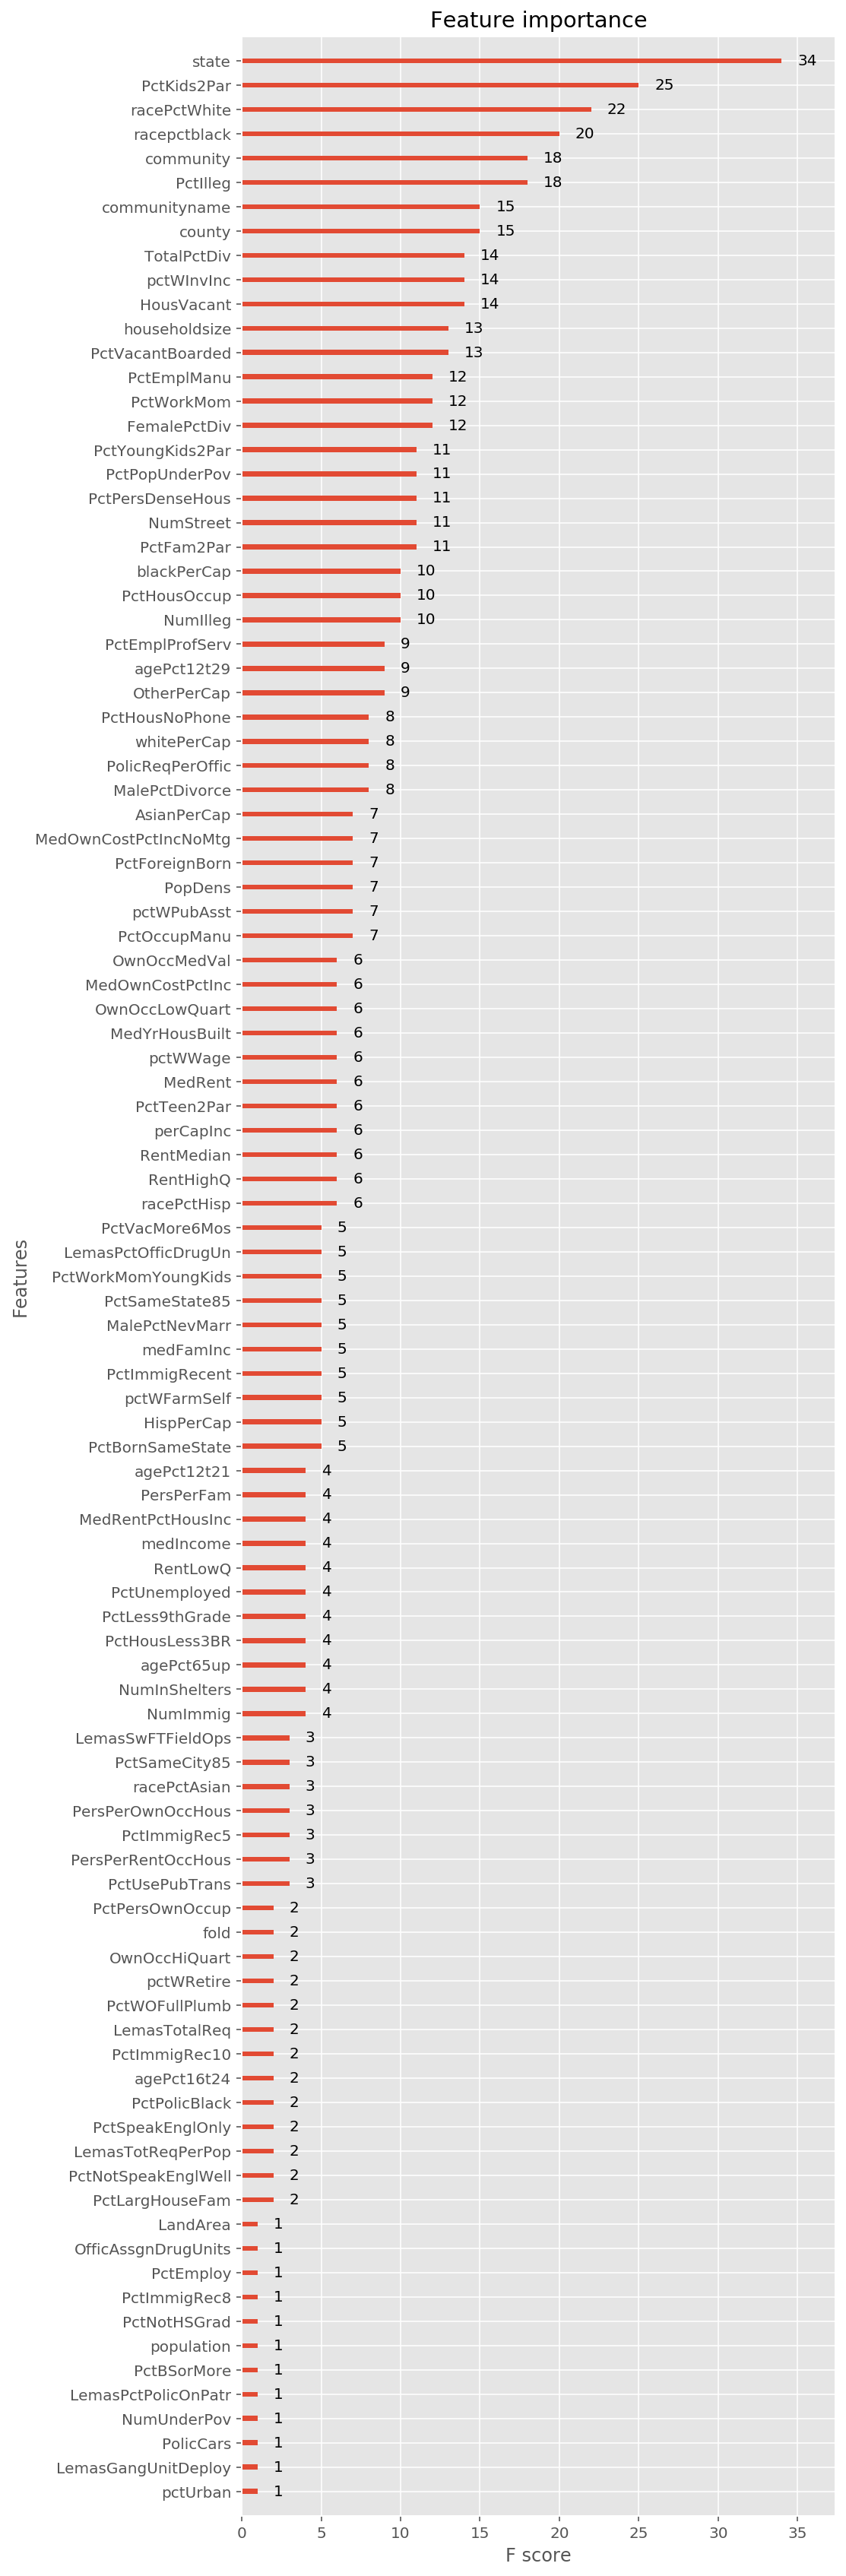

In [33]:
fig, ax = plt.subplots(figsize=(7, 30))
xgb.plot_importance(model, ax=ax)
print("Features importance done")

### Data PreProcessing

In [34]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,target
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [35]:
df.isnull().sum() * 100 / len(df) 

state                   0.000000000000000
county                 58.876629889669005
community              59.027081243731196
communityname           0.000000000000000
fold                    0.000000000000000
                              ...        
LemasPctPolicOnPatr    84.002006018054161
LemasGangUnitDeploy    84.002006018054161
LemasPctOfficDrugUn     0.000000000000000
PolicBudgPerPop        84.002006018054161
target                  0.000000000000000
Length: 128, dtype: float64

columns v_cat_0 and v_cat_1 have 58% and 59% missing values respectively. I will impute them by their median.<br>
column v_cont_30 has around 0.05% missing values. I will impute it by its median.<br>
columns 101 to 117 and 121 to 124 and 126 they all have more than 84% missing values. Therefore, I will drop all of them.<br>

In [36]:
#droping non informative columns
df = df.drop(columns=['state', 'county', 'community', 'communityname', 'fold'], axis=1)

In [37]:
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,target
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [38]:
df.shape

(1994, 123)

In [39]:
#I am also going to drop columns with greater than 75% missing values as they are not going to be very predictive
print("Before dropping: {} features".format(str(df.shape[1])))

#drop features that contain at least some threshold (from the total) of NaN values
cut_tresh = 0.75
to_drop = df.columns[df.count() < df.shape[0]*cut_tresh]

df = df.drop(columns=to_drop)

print("After dropping: {} features".format(str(df.shape[1])))

Before dropping: 123 features
After dropping: 101 features


In [40]:
pd.set_option('display.max_rows', None)

In [41]:
df.isnull().values.sum() #still have one more nan values

1

In [42]:
#lets check which column still have null value
df.isnull().sum()

population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              1
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed            0
PctEmploy                0
PctEmplManu              0
PctEmplProfServ          0
PctOccupManu             0
P

In [43]:
#impute the 'OtherPerCap' nan value with its median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['OtherPerCap'] = imp.fit_transform(df[['OtherPerCap']])

In [44]:
#double check to see if correctly imputed
df['OtherPerCap'].isnull().sum()

0

#### Prepare the data for Machine Learning algorithms

In [45]:
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV


In [46]:
X = df.drop('target', axis=1).values # drop target for training set
y = df['target'].values

In [47]:
df.shape, X.shape, y.shape

((1994, 101), (1994, 100), (1994,))

In [48]:
#spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ridge: 0.660366 (+/- 0.037375)
Lasso: -0.002281 (+/- 0.002921)
Elastic: -0.002281 (+/- 0.002921)
SVR: 0.643919 (+/- 0.040057)
RF_reg: 0.652758 (+/- 0.054266)
ET_reg: 0.666479 (+/- 0.060993)
BR_reg: 0.626482 (+/- 0.051933)
Hub-Reg: 0.652828 (+/- 0.038566)
BayRidge: 0.660183 (+/- 0.037910)
XGB_reg: 0.658440 (+/- 0.063602)
DT_reg: 0.320372 (+/- 0.085830)
KNN_reg: 0.605650 (+/- 0.069336)
Gboost-Reg: 0.654438 (+/- 0.066838)
AdaBoost-Reg: 0.474102 (+/- 0.050050)


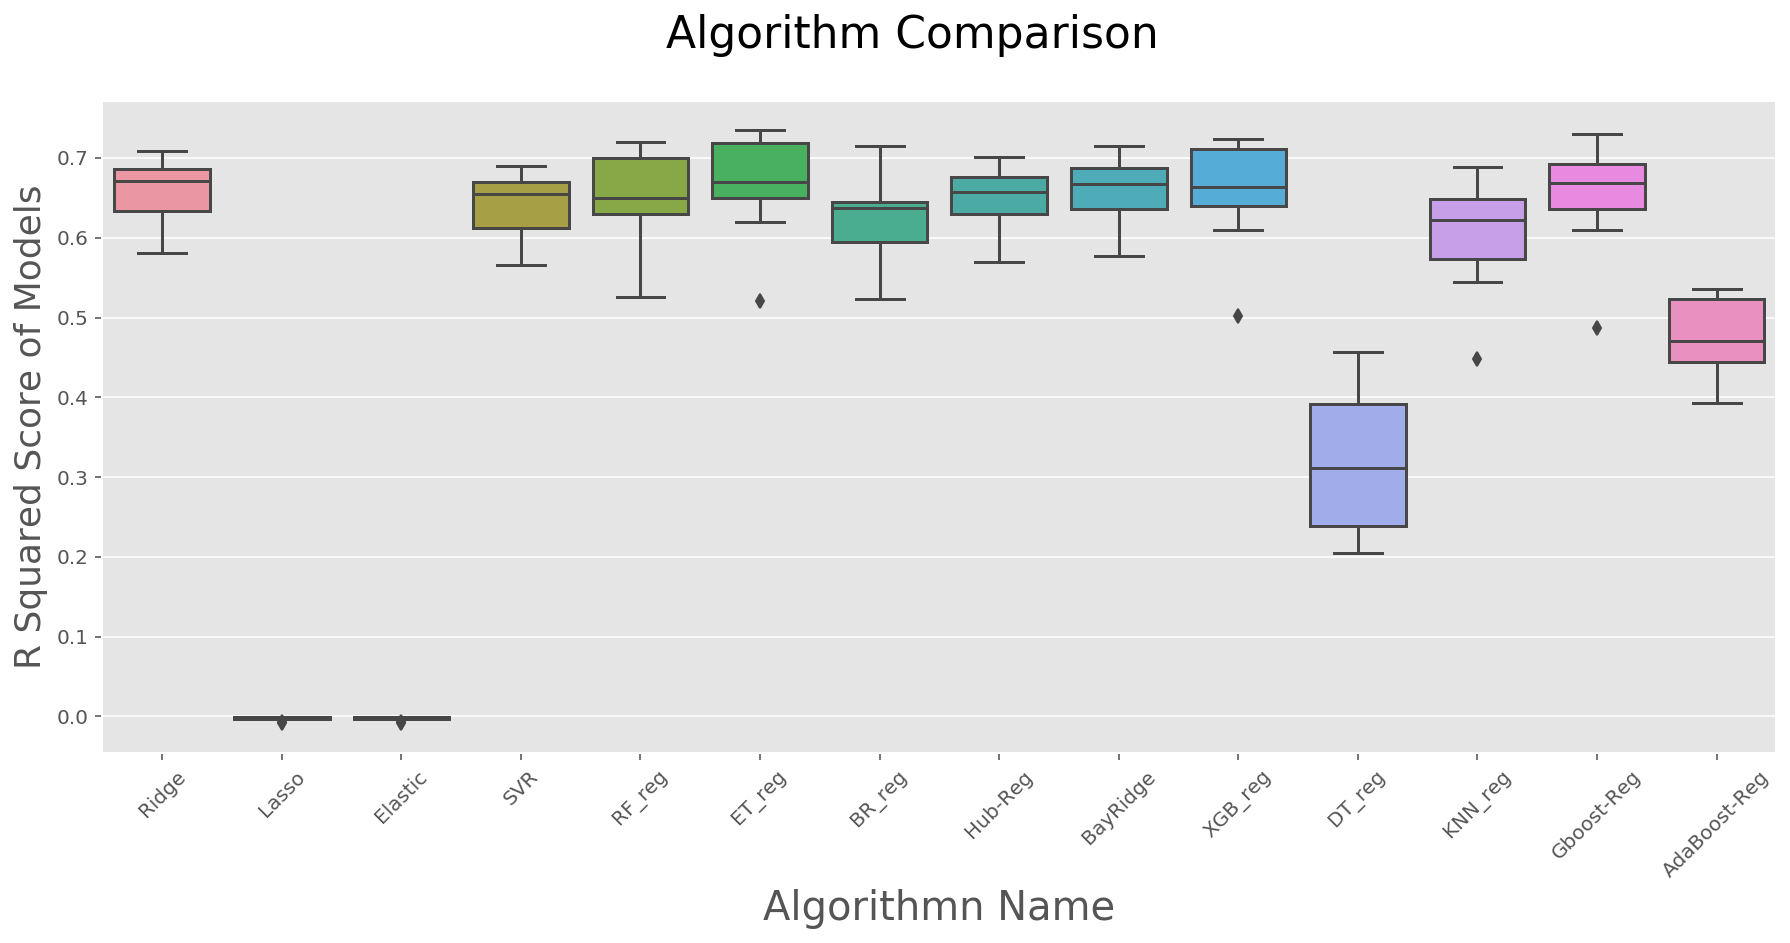

In [49]:
pipelines = []
seed = 2

pipelines.append(
                ("Ridge", 
                 Pipeline([
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Lasso", 
                 Pipeline([
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Elastic", 
                 Pipeline([ 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("SVR",
                 Pipeline([
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("RF_reg",
                 Pipeline([
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("ET_reg",
                 Pipeline([
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("BR_reg",
                 Pipeline([
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Hub-Reg",
                 Pipeline([
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("BayRidge",
                 Pipeline([
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("XGB_reg",
                 Pipeline([
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("DT_reg",
                 Pipeline([
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("KNN_reg",
                 Pipeline([
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
pipelines.append(
                ("Gboost-Reg",
                 Pipeline([
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))
pipelines.append(
                ("AdaBoost-Reg",
                 Pipeline([
                     ("AdaBoost-Reg", AdaBoostRegressor())
                 ])))


#'neg_mean_absolute_error', 'neg_mean_squared_error',''
scoring = 'r2'
n_folds = 10

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

We can see that we got different models with r2 score.<br>

All RandomForestRegression, ExtraTreesRgressor,  GradientBoostingRegressor and XGBRegressor have r2 higher than 0.65.<br>

I will set hyper parameters to the best models and try increase this score.<br>

In [64]:
ET_reg = ExtraTreesRegressor(n_estimators=2000, min_samples_split=10, max_features= 'sqrt', max_depth=20, bootstrap=False,  n_jobs=-1, random_state=42)

In [65]:
ET_reg.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=10, min_weight_fraction_leaf=0.0,
                    n_estimators=2000, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [66]:
y_hat = ET_reg.predict(X_test)

In [67]:
ET_reg.score(X_test, y_test)

0.6397993316627802

In [68]:
pipelines = []
seed = 2

pipelines.append(
                ("ET_reg", 
                 Pipeline([
                     ("ET_reg", ExtraTreesRegressor(n_estimators=2000, min_samples_split=10, max_features= 'sqrt', max_depth=20, bootstrap=False,  n_jobs=-1))
                      ]))
                )



#'neg_mean_absolute_error', 'neg_mean_squared_error',''
scoring = 'r2'
n_folds = 10

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

ET_reg: 0.670602 (+/- 0.050105)


In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 20, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10, 15, 20]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
ET_reg = ExtraTreesRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
ET_reg_random = RandomizedSearchCV(estimator = ET_reg, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=seed, 
                               scoring = 'r2', n_jobs = -1)
# Fit the random search model
ET_reg_random.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [61]:
ET_reg_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [69]:
# Predicting with best params
y_hat_Search = ET_reg_random.predict(X_test)

In [70]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("MSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.3567
RandomForest Regressor Prediction R2-score: 0.354
MSE of XGBoost Regressor: 0.05698903740985345
MSE of RandomForest Regressor: 0.058076967209994196 
